# <u>Spotify Hit Predictor Model for 60's Dataset</u>

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

### Loading Dataset

In [2]:
df=pd.read_csv("dataset-of-60s.csv")
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8642 entries, 0 to 8641
Data columns (total 19 columns):
track               8642 non-null object
artist              8642 non-null object
uri                 8642 non-null object
danceability        8642 non-null float64
energy              8642 non-null float64
key                 8642 non-null int64
loudness            8642 non-null float64
mode                8642 non-null int64
speechiness         8642 non-null float64
acousticness        8642 non-null float64
instrumentalness    8642 non-null float64
liveness            8642 non-null float64
valence             8642 non-null float64
tempo               8642 non-null float64
duration_ms         8642 non-null int64
time_signature      8642 non-null int64
chorus_hit          8642 non-null float64
sections            8642 non-null int64
target              8642 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.3+ MB


In [4]:
df.shape

(8642, 19)

### Shuffling of Data

In [5]:
df=df.sample(frac=1)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
5078,Monday Monday,Sérgio Mendes,spotify:track:1taOHAAluyUC0iYyqAz127,0.593,0.505,0,-11.237,1,0.0275,0.294,0.000002,0.196,0.868,135.309,150773,4,25.65586,10,0
1158,Serrana,Javier Solís,spotify:track:6DPks8e5zIGlJoRNaCEhP2,0.542,0.327,9,-11.943,1,0.0377,0.808,0.000005,0.211,0.703,120.419,158933,4,81.29181,7,0
285,31 Flavors,The Shirelles,spotify:track:24mR7NmnxdNXxxYnZ4qOTf,0.662,0.671,0,-3.045,1,0.0294,0.304,0.000000,0.341,0.920,130.922,118333,4,38.32771,6,1
5473,Jennifer Juniper,Donovan,spotify:track:1okJcHTIrR5nQayHTZkGzI,0.615,0.291,2,-19.480,1,0.0317,0.258,0.000917,0.519,0.881,129.367,160160,4,33.45565,9,1
4124,Pushover,Etta James,spotify:track:25oQDQWlWmNzXwxoBex5Xu,0.757,0.624,5,-10.019,1,0.1090,0.659,0.000000,0.506,0.936,120.180,174733,4,42.23378,8,1


### Balancing of Data

In [6]:
#Dropping Categorical features
X=df.drop(['target',"track","artist","uri"],axis=1)
X.shape    #modified dataframe for X

(8642, 15)

In [7]:
Y=df["target"]
hit_flop_count=Y.value_counts()
hit_flop_count

1    4321
0    4321
Name: target, dtype: int64

In [8]:
Y=Y.values

### Standardizing the Inputs

In [9]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

### Split the dataset into Train, Test, Validation set

In [10]:
#train-test split in 90%-10%
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, 
                                test_size=0.1, random_state=1)

In [11]:
#Train-Validation split 90%-10%
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, 
                                test_size=(1/9), random_state=1)
#1/9 of 90% is 10% as we are using train if we use Scaled X then we use test size as 0.1

In [12]:
x_train.shape,x_test.shape,x_val.shape

((6912, 15), (865, 15), (865, 15))

### Creating Deep Learning Algorithm

In [13]:
nn = 200 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

In [14]:
model_60 = keras.Sequential([

keras.layers.Flatten(), #to flaten our data for better results 
keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer

keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    
    ])

In [15]:
model_60.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [16]:
#fitting the model 
model_fit = model_60.fit(x_train, y_train, epochs=20,
                         validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
70/70 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7135 - val_loss: 0.5354 - val_accuracy: 0.7445
Epoch 2/20
70/70 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7527 - val_loss: 0.5315 - val_accuracy: 0.7434
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7662 - val_loss: 0.5087 - val_accuracy: 0.7561
Epoch 4/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7733 - val_loss: 0.5103 - val_accuracy: 0.7549
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7865 - val_loss: 0.4998 - val_accuracy: 0.7642
Epoch 6/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7896 - val_loss: 0.5068 - val_accuracy: 0.7630
Epoch 7/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7950 - val_loss: 0.5132 - val_accuracy: 0.7572
Epoch 8/20
70/70 [==

In [17]:
#Storing the predictions
predictions = model_60.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

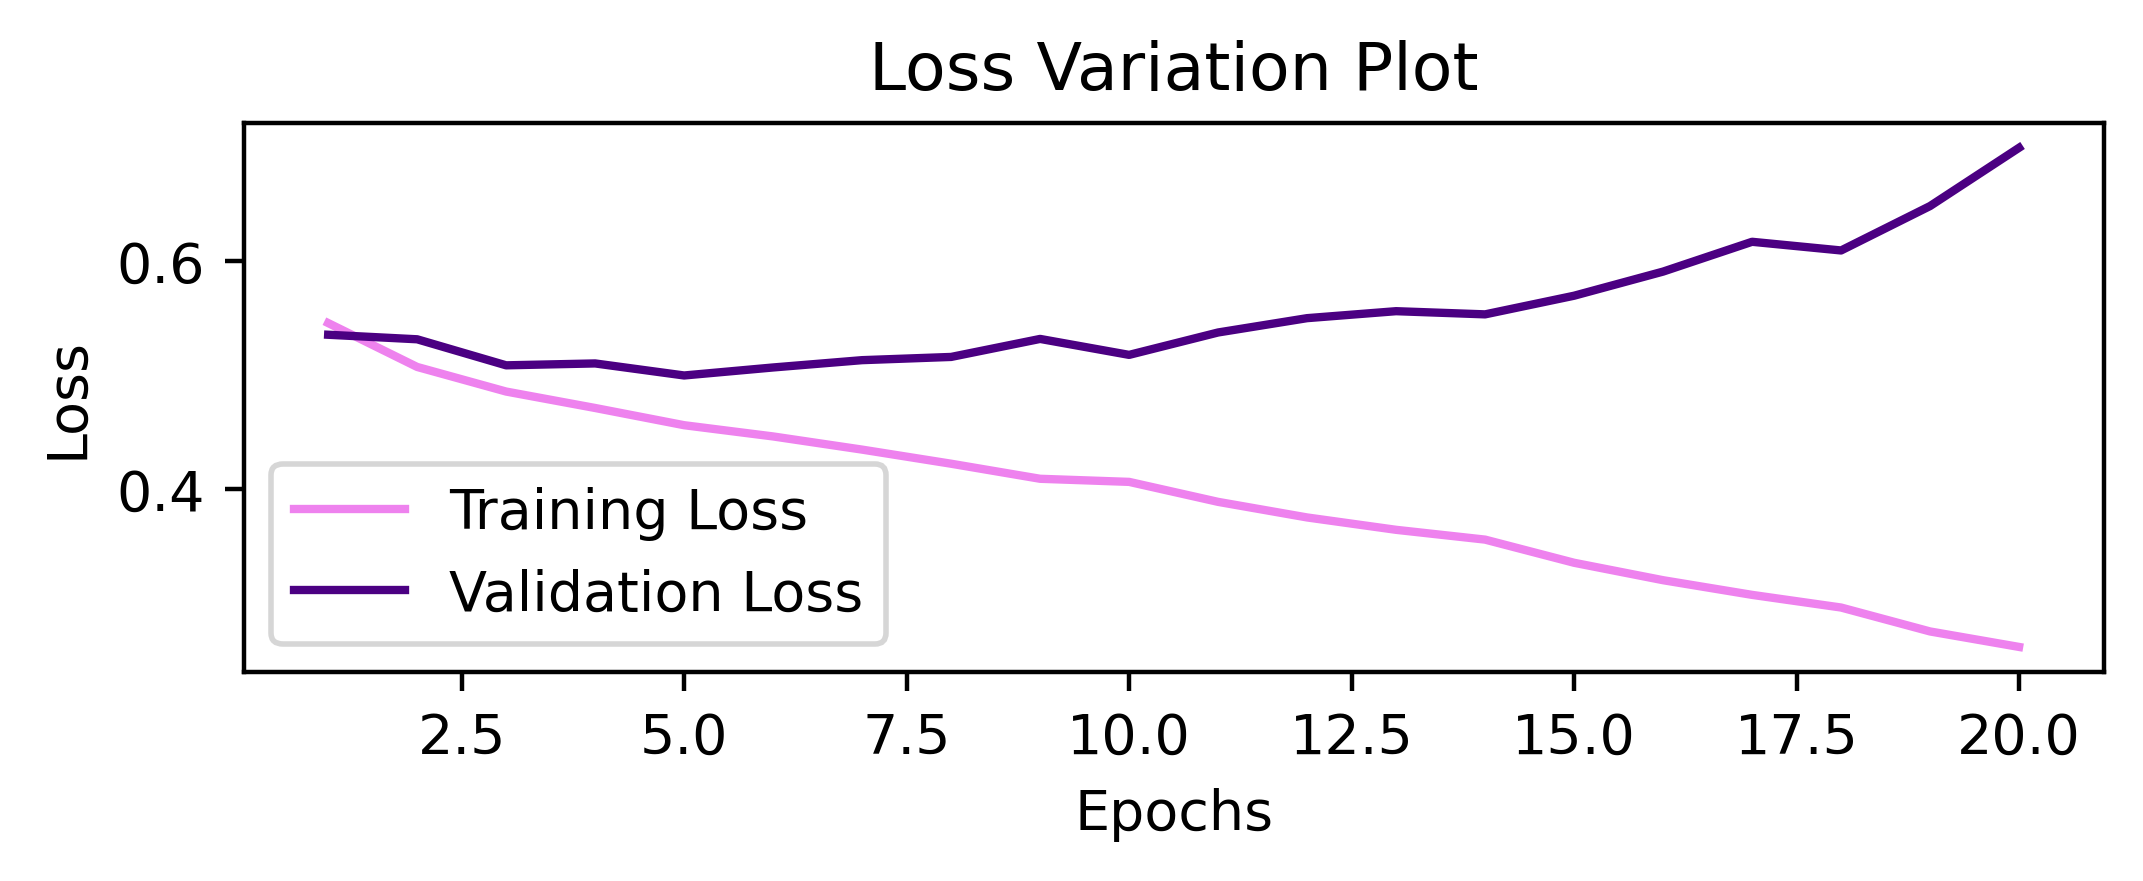

In [18]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#### Accuracy Variation Plot

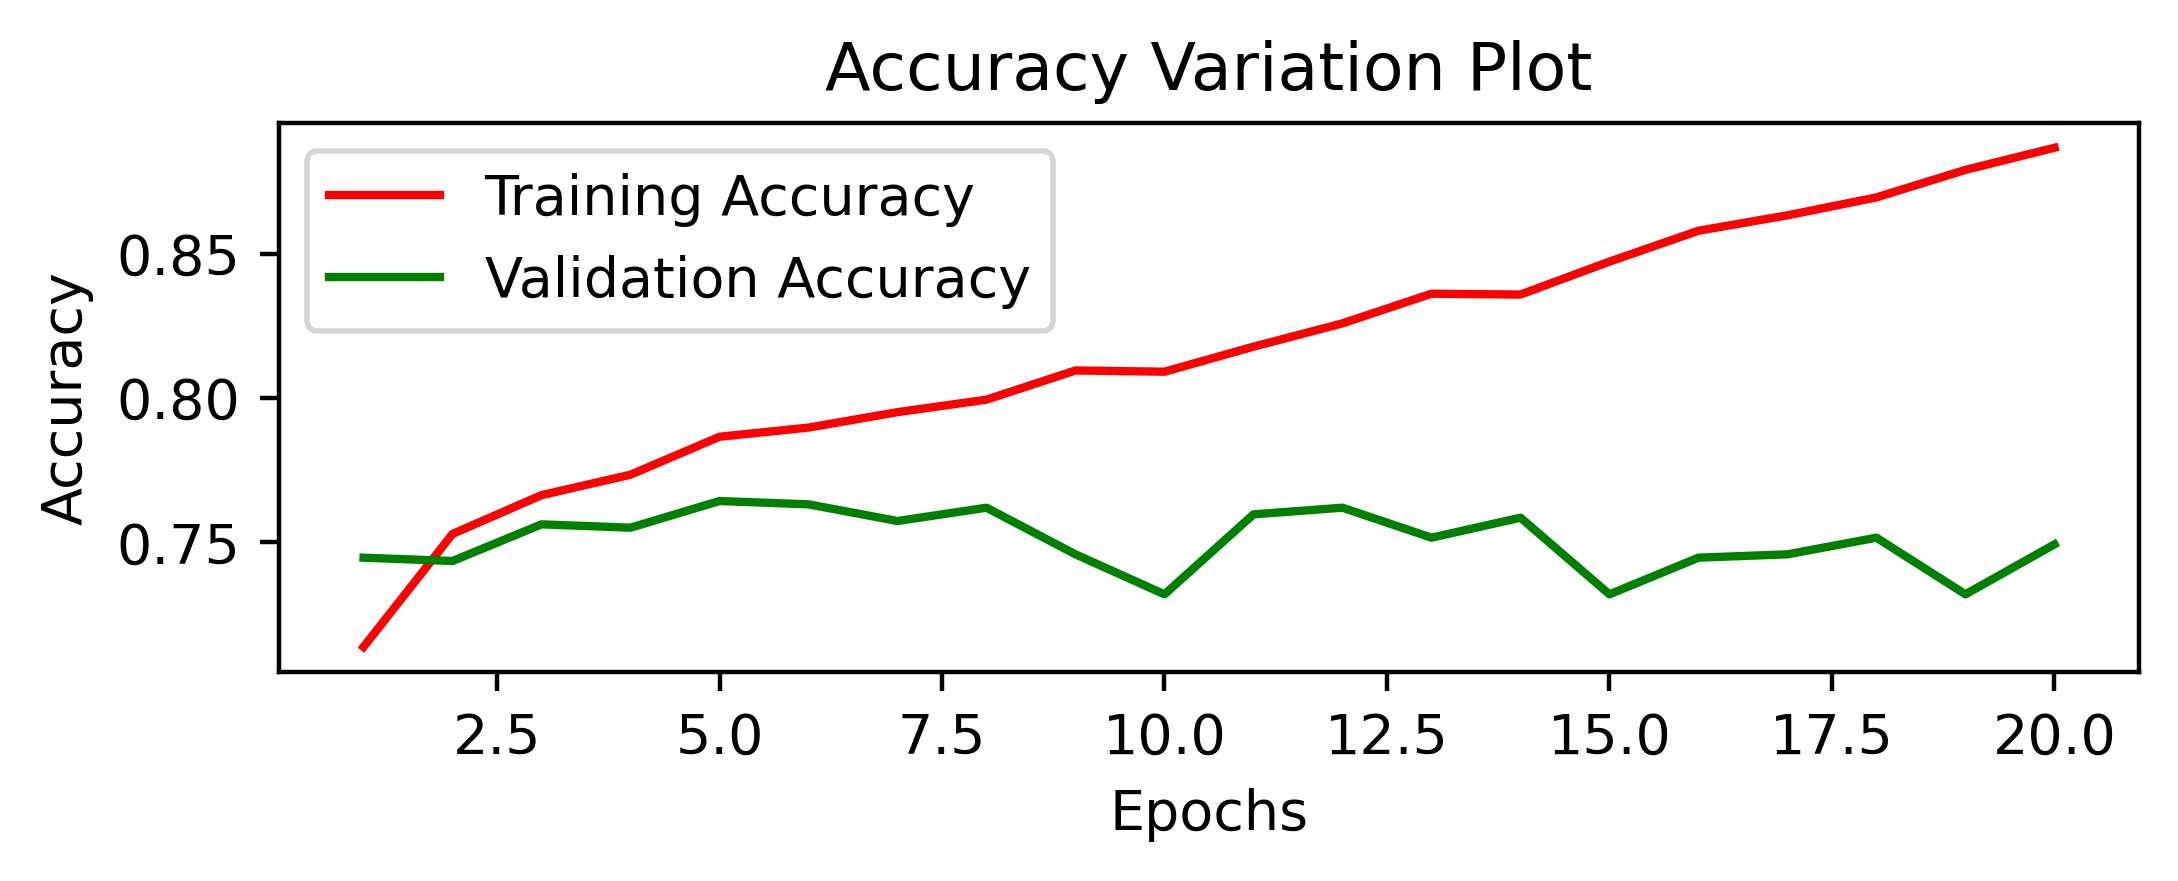

In [19]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Testing Model

In [20]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.03258432 0.96741563]
Predicted: 1
Original: 1


### Saving model and Verifying

In [22]:
model_60.save('Trained_model_60')    #saved as protobuf (.pb)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_60\assets


In [23]:
model_60.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 200)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 84,002
Trainable params: 84,002
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = tf.keras.models.load_model('Trained_model_60')
print(x_test[1])

[-0.66084679 -0.71407192  1.42715354 -0.39437636 -1.75836744  0.08840444
 -1.19284939  1.26832527  2.79405737 -0.46124144 -0.82396239  1.64770825
 -1.55010525 -1.18314186  0.95073932]


In [25]:
print(x_test[1].reshape( 1,-1))

[[-0.66084679 -0.71407192  1.42715354 -0.39437636 -1.75836744  0.08840444
  -1.19284939  1.26832527  2.79405737 -0.46124144 -0.82396239  1.64770825
  -1.55010525 -1.18314186  0.95073932]]


In [26]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.9435685  0.05643148]]
